# Statistical Data Analysis
## ADNI Alzheimer's Data
- Functions/algorithms used for calculating the statistics are in the sda module

In [1]:
# import packages
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import wrangle_adni to import/wrangle the data
from adnidatawrangling import wrangle_adni

# import custom modules eda, sda
# eda: exploratory data analysis module for additional functions
# sda: statistical data analysis module
import eda, sda, opt

# set seaborn defaults
sns.set()

In [2]:
# import data, clean, and extract data
adni_comp, clin_data, scan_data = wrangle_adni()

In [3]:
# extract final exam data: only the last exam for each patient
final_exam = eda.get_final_exam(adni_comp)

# calculate the change in variables over the course of the study
eda.calc_deltas(final_exam)

### Statistical Questions:
- Change in biomarkers
    - Is there a difference between males and females in the amount of change observed in biomarkers with progression towards Alzheimer's Disease (AD)?
        - Further questions will be split by males/females if a difference is found
        - Permutation sampling will be used here to test if males/females come from the same distribution with regards to the amount of change observed
    - Which biomarkers show a statistically significant change as a person develops AD?
    - In biomarkers that show a change, what amount of change is correlated with progression towards AD?
- Biomarker baseline values as predictors of AD
    - Are there statistically significant thresholds for baseline values of a biomarker that suggest a person will develop AD?
        - How does this vary when including/excluding certain diagnosis groups?
            1. Looking at the entire sample of patients (all baseline diagnoses, including those with AD already)
            2. Only patients that were cognitively normal (CN) or had mild cognitive impairment (MCI) at baseline
            3. Including only patients that were CN at baseline
        - Exploratory data analysis suggests that there may be different thresholds for different genders

#### Change in Biomarkers
- From the exploratory data analysis, all biomarkers were revealed as good candidates for statistical analysis
    - Clinical tests: CDRSB, ADAS11, ADAS13, MMSE, RAVLT_immediate
    - Brain scans: Hippocampus, Ventricles, WholeBrain, Entorhinal, MidTemp
- Approach
    - As sample sizes are not very large, bootstrapping will be used to generate a distribution for the change in each biomarker for patients that showed no change in diagnosis during the study
    - The null hypothesis is that when patients are divided into groups based on their change in diagnosis (CN to MCI, MCI to AD, CN to AD) all groups will have the same distribution as the group that ended the study with no change
        - May have to examine whether patients with no change in diagnosis that are not CN (MCI to MCI and AD to AD) impact the results
    - The alternative hypothesis is that the distributions for each group will be different enough that threshold values can be identified to signify beginning early treatment for MCI/AD or raising concerns about progression to AD
        - The goal of this analysis to produce confidence intervals for each diagnosis group
            - This will be used to identify an amount of change that should be of concern
            - There is less of a focus on obtaining p-values for this analysis

#### Changes in CDRSB
- Test for Differences Between Genders

A permutation test reveals that males/females should not be divided when analyzing changes in CDRSB. The observed difference between the mean change for males and mean change for females is nearly 0, which is what is expected under the null hypothesis that they come from the same distribution.

Distribution Test for Males/Females
Variable:  CDRSB_delta
If p < 0.05, then split the data by gender
p-value:  0.4406


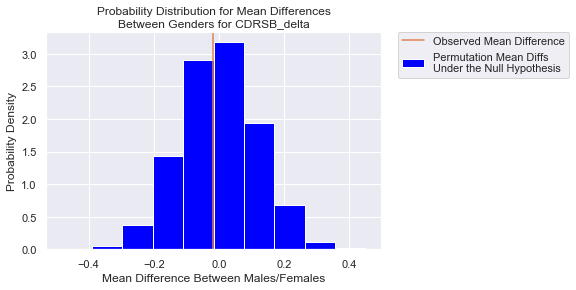

In [4]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'CDRSB_delta', 10000)

#### Changes in ADAS11
- Test for Differences Between Genders

Results of the permutations test suggest that ADAS11 analysis should be split by gender. Running the test multiple times consistently produces p-values < 0.05, suggesting there is less than a 5% probability that the changes in ADAS11 observed during this study are the same between males and females. 

Distribution Test for Males/Females
Variable:  ADAS11_delta
If p < 0.05, then split the data by gender
p-value:  0.0459


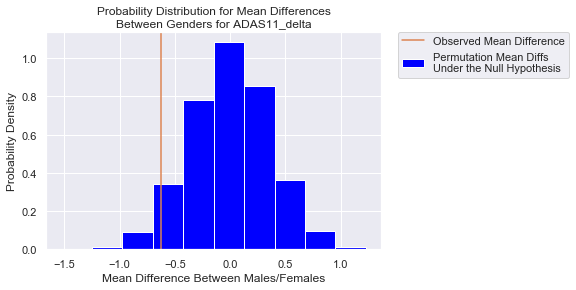

In [5]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'ADAS11_delta', 10000)

#### Changes in ADAS13
- Test for Differences Between Genders

The permutations test for ADAS13 changes did not have a significant p-value, but it was very close. Because the p-value was about 0.07 and because I'm splitting ADAS11 by gender, I will also split ADAS13 by gender. I may look at what happens when not split by gender to see if there is any substantial difference in outcomes.

Distribution Test for Males/Females
Variable:  ADAS13_delta
If p < 0.05, then split the data by gender
p-value:  0.0731


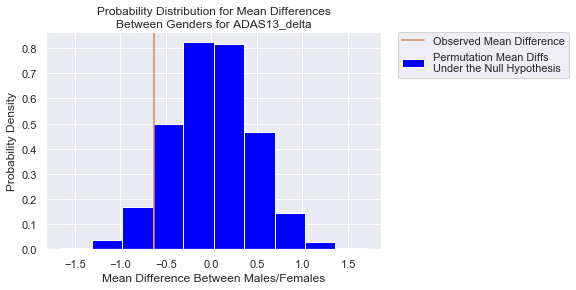

In [6]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'ADAS13_delta', 10000)

#### Changes in MMSE
- Test for Differences Between Genders

A permutation test suggests that males and females should not be separated for analysis. Probabilities of 0.11 to 0.13 were common, suggesting that there might be a difference in the mean changes observed between males and females, but there is enough uncertainty to keep males/females together. There was only a 16% difference between the means compared to the global mean with males/females grouped together.

Distribution Test for Males/Females
Variable:  MMSE_delta
If p < 0.05, then split the data by gender
p-value:  0.1133


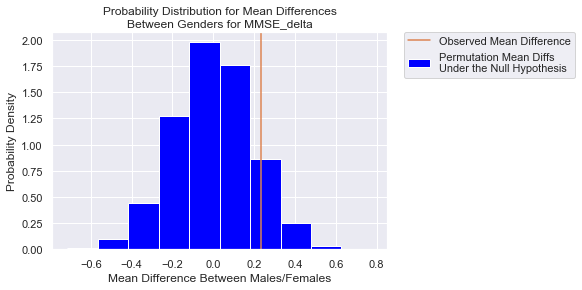

In [7]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'MMSE_delta', 10000)

In [8]:
fe_males, fe_females = sda.divide_genders(final_exam)

In [9]:
print('mean MMSE_delta for males: ', np.mean(fe_males.MMSE_delta))
print('mean MMSE_delta for females: ', np.mean(fe_females.MMSE_delta))
print('percent difference between means: ', 
      (np.mean(fe_females.MMSE_delta)-np.mean(fe_males.MMSE_delta))/np.mean(final_exam.MMSE_delta))


mean MMSE_delta for males:  -1.3348909657320873
mean MMSE_delta for females:  -1.566287878787879
percent difference between means:  0.160768639118335


#### Changes in RAVLT_immediate
- Test for Differences Between Genders

A permutation test for differences in RAVLT_immediate changes between genders suggests that the data can be considered together rather than being split by gender. The p-values around 0.16-0.17, suggest that observed mean differences in RAVLT_immediate changes could possibly be due to random chance.

Distribution Test for Males/Females
Variable:  RAVLT_delta
If p < 0.05, then split the data by gender
p-value:  0.1627


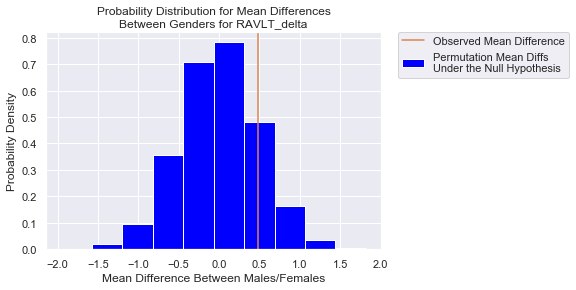

In [10]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'RAVLT_delta', 10000)

#### Summary of Gender Analysis on Changes in Clinical Biomarkers
ADAS11 and ADAS13 changes will be divided by gender when searching for correlation with progression to Alzheimer's Disease. CDRSB, MMSE, and RAVLT_immediate changes will use the combined dataset for males/females.

#### Changes in Hippocampus
- Test for Differences Between Genders

A permutation test suggests that males/females should not be separated when analyzing changes in Hippocampus volume. The p-value was large enough that there is too much uncertainty to divide the data by gender.

Distribution Test for Males/Females
Variable:  Hippocampus_delta
If p < 0.05, then split the data by gender
p-value:  0.2274


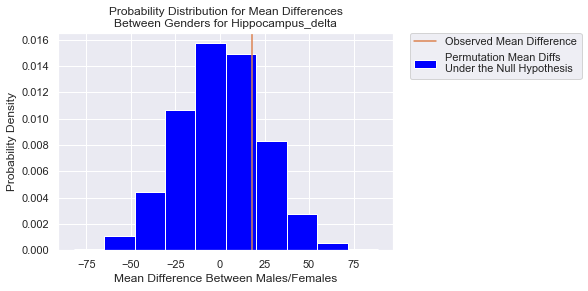

In [11]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'Hippocampus_delta', 10000)

#### Changes in Ventricles
- Test for Differences Between Genders

Results from the permutations test on changes in ventricles reveal that there is a difference in the observed amount of change between males/females in the ADNI data. Therefore, the data will be divided by gender for analysis of changes in ventricles relating to a change in diagnosis.

Distribution Test for Males/Females
Variable:  Ventricles_delta
If p < 0.05, then split the data by gender
p-value:  0.0003


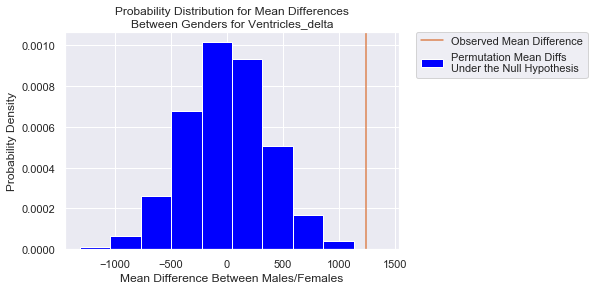

In [12]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'Ventricles_delta', 10000)

#### Changes of WholeBrain
- Test for Differences Between Genders

Results from the permutation test suggest that the data should not be divided by gender for analysis of changes in WholeBrain relating to change in diagnosis. The probability is too high that the observed difference between males/females is random chance to split the data by gender.

Distribution Test for Males/Females
Variable:  WholeBrain_delta
If p < 0.05, then split the data by gender
p-value:  0.1997


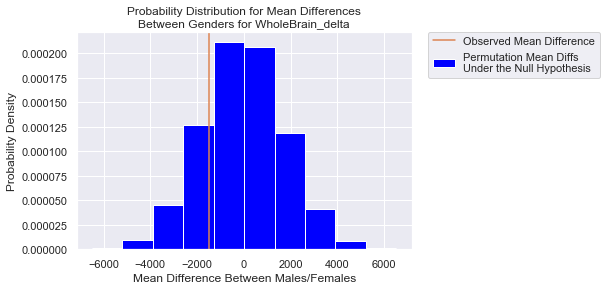

In [13]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'WholeBrain_delta', 10000)

#### Changes in Entorhinal
- Test for Differences Between Genders

The test for difference between males/females for changes in Entorhinal does not have a great enough probability to warrant separating the data by gender. It may be that a difference would have been found with a larger sample size, but there is not enough confidence to split the data by gender.

Distribution Test for Males/Females
Variable:  Entorhinal_delta
If p < 0.05, then split the data by gender
p-value:  0.1272


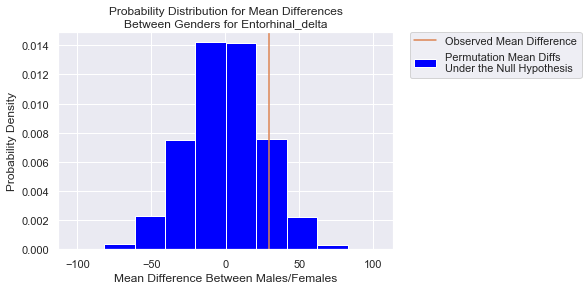

In [14]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'Entorhinal_delta', 10000)

#### Change in MidTemp
- Test for Differences Between Genders

The permutations test for differences between genders for MidTemp changes consistently produces a p-value < 0.05. Therefore the data will be split by gender when looking for a correlation with progression towards AD.

Distribution Test for Males/Females
Variable:  MidTemp_delta
If p < 0.05, then split the data by gender
p-value:  0.0413


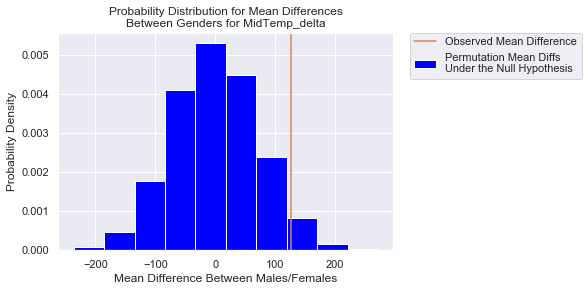

In [15]:
# function parameters are: dataframe, biomarker, number of permutations

sda.test_gender_effect(final_exam, 'MidTemp_delta', 10000)

#### Summary of the Effect of Gender on Change in Biomarkers from Scan Data

The data for changes in Ventricles and MidTemp will be split by gender, while the Hippocampus, WholeBrain, and Entorhinal data will contain data from both genders.

#### Using Change in Biomarkers to Predict a Change in Diagnosis

Bootstrap distributions were created for each diagnosis group. These were used to find confidence intervals that will be useful in predicting whether or not a given change in a specific biomarker indicates a progression towards AD. 

In [16]:
# divide data into groups based on change in diagnosis
# groups were identified in the first part of this analysis that need to be split by gender
# those are ADAS11, ADAS13, Ventricles, and MidTemp (divided by gender)

no_change, cn_mci, mci_ad, cn_ad = sda.get_deltadx_groups(final_exam)
m_no_change, m_cn_mci, m_mci_ad, m_cn_ad = sda.get_deltadx_groups(fe_males)
f_no_change, f_cn_mci, f_mci_ad, f_cn_ad = sda.get_deltadx_groups(fe_females)

In [17]:
# setup dataframe to store the results for summarizing

#cols = ['biomarker', 'thresh', 'end_cn', 'no_prog', 'prog_CN_MCI', 'prog_MCI_AD', 'prog_CN_AD']
cols = ['biomarker', 'thresh', 'pct', 'group']
changes = pd.DataFrame(columns=cols)

#### Changes CDRSB for Predicting Change in Diagnosis

Analysis of CDRSB suggests that a change in CDRSB of 0.60 is worth noting concern. In fact, over 95% of people with a change in CDRSB greater than the threshold value of about 0.60 developed AD during the study, including 100% of the people that went from CN to AD. This threshold value was less effective at detecting progression from CN to MCI, with only 46% of patients that progressed from CN to MCI having a change in CDRSB of at least 0.60. Only about 4% of patients with a change in CDRSB of 0.60 or more ended the study as CN.

95% Confidence Interval:  0.4148471615720524  to  0.5998908296943232


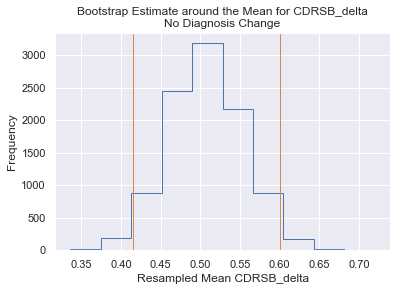

In [18]:
# calculate the confidence interval for patients with no change in diagnosis
CDRSB_delta_conf = sda.bs(no_change, 'CDRSB_delta', 10000)

In [19]:
# calc percent in each diagnosis group beyond threshold
# supply the full final_exam data, the biomarker, and the confidence level of interest

changes = sda.eval_bs(final_exam, 'CDRSB_delta', CDRSB_delta_conf, changes, cols)

Threshold:  0.5998908296943232
Percent exceeding threshold that ended CN:  3.63 %
Percent exceeding threshold that ended MCI:  27.12 %
Percent exceeding threshold that ended AD:  69.25 %
Percent with no diagnosis change exceeding threshold:  24.34 %
Percent progressing CN to MCI exceeding threshold:  45.95 %
Percent Progressing MCI to AD exceeding threshold:  95.45 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in ADAS11 for Males

The threshold value for males appears to be an increase of about 1.69 for ADAS11. This would be a very rare case for someone that didn't experience a diagnosis change, while 57% of male patients that progressed from CN to MCI had an ADAS11 change of at least 1.69. More than 80% of all males that developed AD had an ADAS11 increase of at least 1.69, while every male patient that progressed from CN to AD had an ADAS11 change at least this high. About 15% of males patients with ADAS11 change exceeding the threshold ended the study with a CN diagnosis. For this reason, it would be suggested to use this threshold along with other biomarkers to predict a diagnosis.

95% Confidence Interval:  0.7529226907630523  to  1.6882143574297193


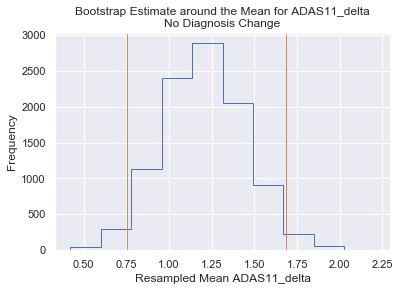

In [20]:
# calculate the confidence interval for patients with no change in diagnosis
m_adas11_conf = sda.bs(m_no_change, 'ADAS11_delta', 10000)

In [21]:
# calc percent in each diagnosis group beyond threshold
# supply the full final_exam data, the biomarker, and the confidence level of interest

changes = sda.eval_bs(final_exam, 'ADAS11_delta', m_adas11_conf, changes, cols, gender='males')

Threshold:  1.6882143574297193
Percent exceeding threshold that ended CN:  14.53 %
Percent exceeding threshold that ended MCI:  35.29 %
Percent exceeding threshold that ended AD:  50.17 %
Percent with no diagnosis change exceeding threshold:  37.55 %
Percent progressing CN to MCI exceeding threshold:  57.14 %
Percent Progressing MCI to AD exceeding threshold:  80.58 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in ADAS11 for Females

Females displayed a higher threshold for ADAS11 change than males. The threshold value for females is about 2.05 compared to males 1.69. An ADAS11 change of 2.05 or more for females was observed in 85% or more for patients that developed AD, with 100% of female patients that progressed from CN to AD having changes above this threshold. About 50% of females that progressed from CN to MCI had an ADAS11 change of at least 2.05. About 14% of females that had an ADAS11 change at or above threshold ended the study as CN. Additional biomarkers should probably be considered along with ADAS11 changes for females given this result.

95% Confidence Interval:  1.1373672248803828  to  2.065479066985646


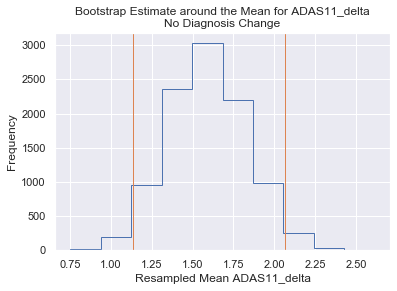

In [22]:
# calculate the confidence interval for patients with no change in diagnosis
f_adas11_conf = sda.bs(f_no_change, 'ADAS11_delta', 10000)

In [23]:
# calc percent in each diagnosis group beyond threshold
# supply the full final_exam data, the biomarker, and the confidence level of interest

changes = sda.eval_bs(final_exam, 'ADAS11_delta', f_adas11_conf, changes, cols, gender='females')

Threshold:  2.065479066985646
Percent exceeding threshold that ended CN:  14.35 %
Percent exceeding threshold that ended MCI:  27.35 %
Percent exceeding threshold that ended AD:  58.3 %
Percent with no diagnosis change exceeding threshold:  35.17 %
Percent progressing CN to MCI exceeding threshold:  50.0 %
Percent Progressing MCI to AD exceeding threshold:  84.93 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


# Change in ADAS13 for Males

The threshold for experiencing a diagnosis change for change in ADAS13 for males was 2.12. About 52% of males that progressed from CN to MCI displayed a change of at least 2.12, while about 80% of males who progressed from MCI to AD exhibited an ADAS13 change of at least 2.12, with 100% of males that progressed from CN to AD displaying a change of at least 2.12. About 12% of males with ADAS13 changes exceeding the threshold ended the study as CN. Therefore this threshold should probably be considered with other biomarkers when trying to predict a diagnosis.

95% Confidence Interval:  1.0241962851405628  to  2.117307228915662


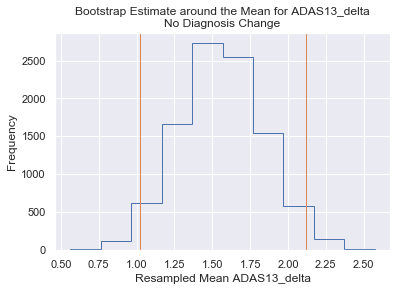

In [24]:
# calculate the confidence interval for patients with no change in diagnosis
m_adas13_conf = sda.bs(m_no_change, 'ADAS13_delta', 10000)

In [25]:
# calc percent in each diagnosis group beyond threshold
# supply the full final_exam data, the biomarker, and the confidence level of interest

changes = sda.eval_bs(final_exam, 'ADAS13_delta', m_adas13_conf, changes, cols, gender='males')

Threshold:  2.117307228915662
Percent exceeding threshold that ended CN:  12.14 %
Percent exceeding threshold that ended MCI:  37.86 %
Percent exceeding threshold that ended AD:  50.0 %
Percent with no diagnosis change exceeding threshold:  36.55 %
Percent progressing CN to MCI exceeding threshold:  52.38 %
Percent Progressing MCI to AD exceeding threshold:  79.61 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in ADAS13 for Females

Similar to ADAS11, females had a higher threshold for ADAS13 changes that are associated with a change in diagnosis. 100% of females who progressed from CN to AD had an ADAS13 change of at least 2.40, with about 89% of females who progressed from MCI to AD above this threshold as well. It is important to note that nearly 63% of females who only progressed from CN to MCI displayed a change in ADAS13 above the threshold, suggesting a change in ADAS13 of 2.4 or more alone is not enough to strongly predict a progression to AD. This is especially true when considering about 19% of females with ADAS13 changes exceeding the threshold ended the study with a CN diagnosis.

95% Confidence Interval:  1.2720071770334926  to  2.402014354066985


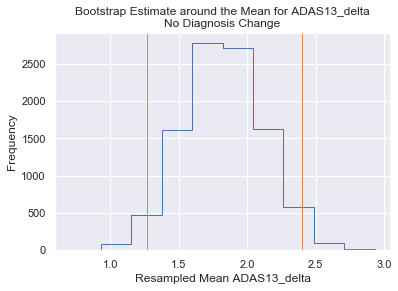

In [26]:
# calculate the confidence interval for patients with no change in diagnosis
f_adas13_conf = sda.bs(f_no_change, 'ADAS13_delta', 10000)

In [27]:
changes = sda.eval_bs(final_exam, 'ADAS13_delta', f_adas13_conf, changes, cols, gender='females')

Threshold:  2.402014354066985
Percent exceeding threshold that ended CN:  19.33 %
Percent exceeding threshold that ended MCI:  26.47 %
Percent exceeding threshold that ended AD:  54.2 %
Percent with no diagnosis change exceeding threshold:  37.56 %
Percent progressing CN to MCI exceeding threshold:  62.5 %
Percent Progressing MCI to AD exceeding threshold:  89.04 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Changes in MMSE

MMSE analysis for males/females points to a threshold change of about -1.01 for progression. While this change is extremely rare for patients that displayed no change in diagnosis, 100% of patients that progressed from CN to AD during the study exhibited an MMSE change at least this large, while about 84% of patients that progressed from MCI to AD also displayed a change this large. Only about 27% of patients that progressed from CN to MCI had an MMSE change of -1.01 or larger, suggesting this is an ok indicator of progression to AD. About 15% of patients with an MMSE change exceeding threshold ended the study as CN. This measure should probably be considered with other biomarkers for this reason.

95% Confidence Interval:  -1.0065775109170307  to  -0.6473799126637555


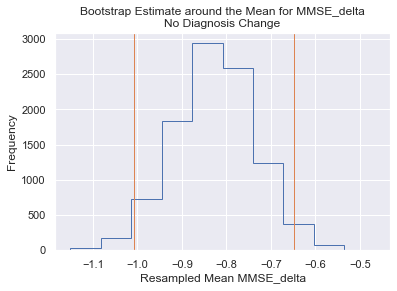

In [28]:
# calculate the confidence interval for patients with no change in diagnosis
mmse_conf = sda.bs(no_change, 'MMSE_delta', 10000)

In [29]:
changes = sda.eval_bs(final_exam, 'MMSE_delta', mmse_conf, changes, cols)

Threshold:  -1.0065775109170307
Percent exceeding threshold that ended CN:  14.89 %
Percent exceeding threshold that ended MCI:  28.0 %
Percent exceeding threshold that ended AD:  57.11 %
Percent with no diagnosis change exceeding threshold:  30.79 %
Percent progressing CN to MCI exceeding threshold:  27.03 %
Percent Progressing MCI to AD exceeding threshold:  83.52 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in RAVLT_immediate

Males and females were analyzed together for RAVLT_immediate. The threshold for RAVLT_immediate change was -1.90 for males/females. For patients progressing from CN to AD, 100% were above this threshold, while about 74% of patients that progressed from MCI to AD showed RAVLT_immediate changes at least this large. Nearly 60% of patients that progressed from CN to MCI displayed a RAVLT_immediate change of at least -1.90, suggesting this threshold is good at predicting a change in diagnosis, but not necessarily good for predicting AD when considered alone. About 23% of patients that exceeded this change in RAVLT threshold ended the study with a CN diagnosis.

95% Confidence Interval:  -1.9279475982532752  to  -0.9006277292576422


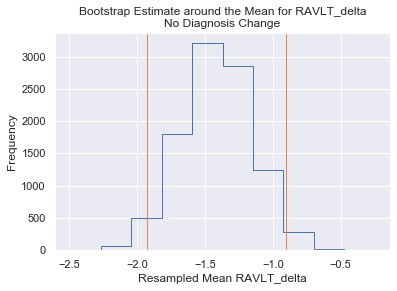

In [30]:
# calculate the confidence interval for patients with no change in diagnosis
ravlt_conf = sda.bs(no_change, 'RAVLT_delta', 10000)

In [31]:
changes = sda.eval_bs(final_exam, 'RAVLT_delta', ravlt_conf, changes, cols)

Threshold:  -1.9279475982532752
Percent exceeding threshold that ended CN:  23.44 %
Percent exceeding threshold that ended MCI:  35.41 %
Percent exceeding threshold that ended AD:  41.15 %
Percent with no diagnosis change exceeding threshold:  48.36 %
Percent progressing CN to MCI exceeding threshold:  59.46 %
Percent Progressing MCI to AD exceeding threshold:  74.43 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in Hippocampus

Hippocampus changes had a threshold value of about -281. When evaluating this threshold, it appears that many patients progress to AD with hippocampus changes lower than this threshold. Exactly 80% of patients that progressed from CN to AD had a hippocampus change of at least -281, with about 77% of patients that progressed from MCI to AD with a change above the threshold, and nearly 60% of patients that went from CN to MCI were above this threshold. About 26% of patients exceeding this threshold ended the study with a CN diagnosis, suggesting other biomarkers should be included if using change in Hippocampus to predict progression to AD.

95% Confidence Interval:  -280.93119541484714  to  -236.8499727074236


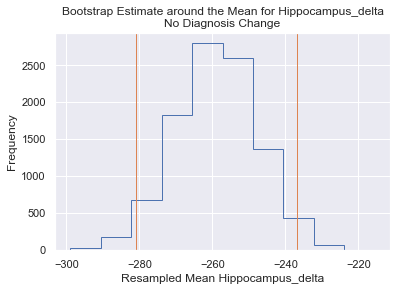

In [32]:
# calculate the confidence interval for patients with no change in diagnosis
hippo_conf = sda.bs(no_change, 'Hippocampus_delta', 10000)

In [33]:
changes = sda.eval_bs(final_exam, 'Hippocampus_delta', hippo_conf, changes, cols)

Threshold:  -280.93119541484714
Percent exceeding threshold that ended CN:  26.22 %
Percent exceeding threshold that ended MCI:  32.87 %
Percent exceeding threshold that ended AD:  40.91 %
Percent with no diagnosis change exceeding threshold:  43.01 %
Percent progressing CN to MCI exceeding threshold:  59.46 %
Percent Progressing MCI to AD exceeding threshold:  77.27 %
Percent Progressing CN to AD exceeding threshold:  80.0 %


#### Change in Ventricles for Males

The threshold value for change in ventricles for males was about 5762. 100% of patients that progressed from CN to AD exceeded this threshold, while about 79% that progressed from MCI to AD exceeded this change. 2/3 of patients that progressed from CN to MCI exceeded this threshold as well. About 19% of patients that exceeded this threshold ended the study with a diagnosis of CN, but most of the patients that showed a change in diagnosis had ventricle changes greater than the threshold value. Hence, a change in ventricles greater than the threshold value should certainly warrant examining other biomarkers for signs of disease progression.

95% Confidence Interval:  4835.063152610442  to  5766.641666666667


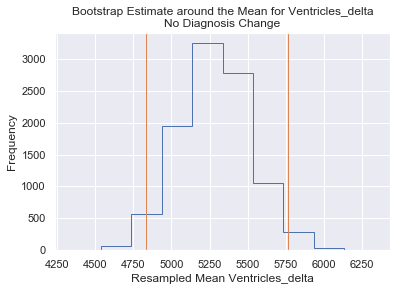

In [34]:
# calculate the confidence interval for patients with no change in diagnosis
m_vent_conf = sda.bs(m_no_change, 'Ventricles_delta', 10000)

In [35]:
changes = sda.eval_bs(final_exam, 'Ventricles_delta', m_vent_conf, changes, cols, gender='males')

Threshold:  5766.641666666667
Percent exceeding threshold that ended CN:  18.79 %
Percent exceeding threshold that ended MCI:  35.82 %
Percent exceeding threshold that ended AD:  45.39 %
Percent with no diagnosis change exceeding threshold:  36.14 %
Percent progressing CN to MCI exceeding threshold:  66.67 %
Percent Progressing MCI to AD exceeding threshold:  78.64 %
Percent Progressing CN to AD exceeding threshold:  100.0 %


#### Change in Ventricles for Females

The story with ventricle changes in females is different than for males. Females displayed a lower threshold, however, a larger percentage of females that exceeded this threshold ended the study with a CN diagnosis (about 24%). Also, many females that developed AD, had ventricle changes that did not exceed the threshold. This suggests that changes in ventricles doesn't predict progression of AD for females as well as it does for males.

95% Confidence Interval:  3850.571889952153  to  4688.978468899521


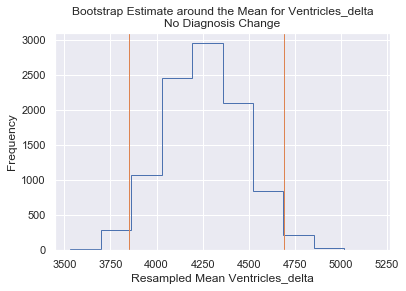

In [36]:
# calculate the confidence interval for patients with no change in diagnosis
f_vent_conf = sda.bs(f_no_change, 'Ventricles_delta', 10000)

In [37]:
changes = sda.eval_bs(final_exam, 'Ventricles_delta', f_vent_conf, changes, cols, gender='females')

Threshold:  4688.978468899521
Percent exceeding threshold that ended CN:  23.61 %
Percent exceeding threshold that ended MCI:  28.24 %
Percent exceeding threshold that ended AD:  48.15 %
Percent with no diagnosis change exceeding threshold:  33.73 %
Percent progressing CN to MCI exceeding threshold:  56.25 %
Percent Progressing MCI to AD exceeding threshold:  83.56 %
Percent Progressing CN to AD exceeding threshold:  66.67 %


#### Whole Brain Changes

The whole brain threshold value was about -21247. However, about 27% of patients that exceeded this threshold of change during the study ended with a CN diagnosis. Also, only 40% of patients that progressed from CN to AD during the study displayed whole brain changes at least this large. Given these values, it appears that whole brain changes are not good predictors for progression to AD for the patients in this study.

95% Confidence Interval:  -21275.49069323144  to  -17941.253629912662


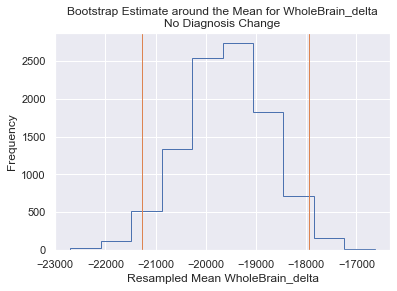

In [38]:
# calculate the confidence interval for patients with no change in diagnosis
wb_conf = sda.bs(no_change, 'WholeBrain_delta', 10000)

In [39]:
changes = sda.eval_bs(final_exam, 'WholeBrain_delta', wb_conf, changes, cols)

Threshold:  -21275.49069323144
Percent exceeding threshold that ended CN:  27.31 %
Percent exceeding threshold that ended MCI:  31.73 %
Percent exceeding threshold that ended AD:  40.96 %
Percent with no diagnosis change exceeding threshold:  38.76 %
Percent progressing CN to MCI exceeding threshold:  54.05 %
Percent Progressing MCI to AD exceeding threshold:  73.3 %
Percent Progressing CN to AD exceeding threshold:  40.0 %


#### Entorhinal Changes

Entorhinal changes show the same basic story as whole brain. A relatively high percentage of patients that exceeded the threshold of -176 and ended the study with a CN diagnosis (about about 29%). Also, many of the patients that showed a change in diagnosis towards AD did not exceed the threshold value. Thus, Entorhinal changes alone are bad predictors of progression in diagnosis for the patients in this study.

95% Confidence Interval:  -175.8431768558952  to  -123.33616266375546


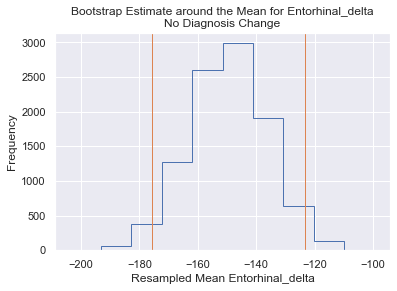

In [40]:
# calculate the confidence interval for patients with no change in diagnosis
ent_conf = sda.bs(no_change, 'Entorhinal_delta', 10000)

In [41]:
changes = sda.eval_bs(final_exam, 'Entorhinal_delta', ent_conf, changes, cols)

Threshold:  -175.8431768558952
Percent exceeding threshold that ended CN:  28.69 %
Percent exceeding threshold that ended MCI:  33.85 %
Percent exceeding threshold that ended AD:  37.46 %
Percent with no diagnosis change exceeding threshold:  46.29 %
Percent progressing CN to MCI exceeding threshold:  40.54 %
Percent Progressing MCI to AD exceeding threshold:  73.3 %
Percent Progressing CN to AD exceeding threshold:  40.0 %


#### MidTemp Changes for Males

MidTemp changes for males also show the same trend as whole brain and entorhinal. A relatively large percentage of patients that exceeded the threshold of -683 ended the study with a CN diagnosis (about 22%). Also, many patients that displayed a change in diagnosis towards AD did not exceed this threshold. MidTemp change in males above threshold was not a good predictor for change in diagnosis for this study group.

95% Confidence Interval:  -683.8899096385542  to  -491.6354919678715


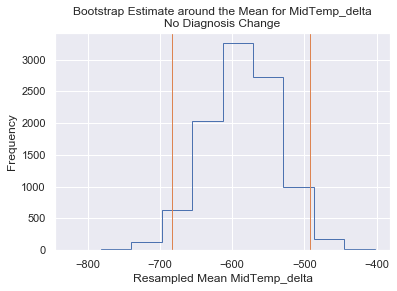

In [42]:
# calculate the confidence interval for patients with no change in diagnosis
m_mt_conf = sda.bs(m_no_change, 'MidTemp_delta', 10000)

In [43]:
changes = sda.eval_bs(final_exam, 'MidTemp_delta', m_mt_conf, changes, cols, gender='males')

Threshold:  -683.8899096385542
Percent exceeding threshold that ended CN:  22.15 %
Percent exceeding threshold that ended MCI:  35.18 %
Percent exceeding threshold that ended AD:  42.67 %
Percent with no diagnosis change exceeding threshold:  41.97 %
Percent progressing CN to MCI exceeding threshold:  66.67 %
Percent Progressing MCI to AD exceeding threshold:  72.82 %
Percent Progressing CN to AD exceeding threshold:  50.0 %


#### MidTemp Changes for Females

The threshold for females was about -774, which was higher than the value for males. However, a similar trend exists, with nearly 27% of females that exceeded the threshold for MidTemp changes ending the study with a CN diagnosis. It should be noted, though, that over 2/3 of females that got worse during the study exhibited MidTemp changes above the threshold. For this reason, MidTemp changes could be considered an ok predictor for females in this study group when considered with other biomarkers.

95% Confidence Interval:  -773.4763755980862  to  -592.3151315789473


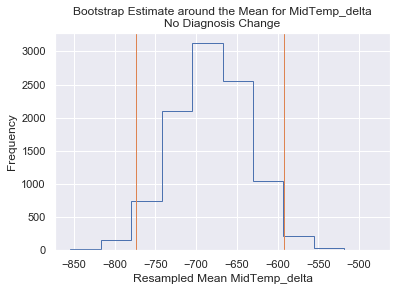

In [44]:
# calculate the confidence interval for patients with no change in diagnosis
f_mt_conf = sda.bs(f_no_change, 'MidTemp_delta', 10000)

In [45]:
changes = sda.eval_bs(final_exam, 'MidTemp_delta', f_mt_conf, changes, cols, gender='females')

Threshold:  -773.4763755980862
Percent exceeding threshold that ended CN:  26.67 %
Percent exceeding threshold that ended MCI:  26.25 %
Percent exceeding threshold that ended AD:  47.08 %
Percent with no diagnosis change exceeding threshold:  39.23 %
Percent progressing CN to MCI exceeding threshold:  62.5 %
Percent Progressing MCI to AD exceeding threshold:  82.19 %
Percent Progressing CN to AD exceeding threshold:  66.67 %


#### Summary of Changes in Clinical Biomarkers

The plot below displays the detection rates for changes in diagnosis for patients that exceeded the calculated thresholds above. Every clinical biomarker showed a 100% detection rate for patients that progressed from CN to AD. The clincial exams also had a high detection rate for patients that progressed from MCI to AD, ranging from about 74% for RAVLT_delta to the highest for CDSRB_delta of about 95%. These are very good detection rates for the two groups that progressed to AD.

Patients that progressed from CN to MCI did not exceed the calculated threshold values as often, with detection rates mostly between about 45% to just over 60%. MMSE_delta had the lowest detection rate, which was around 27%.

The false positive rates are displayed below the Detection rates. Because the primary goal of this analysis was to detect a change in diagnosis, the diagnosis group with no change is displayed as a false positive, however, the better indicator of false positives is probably the group 'Ended CN'. Some of the patients that did not experience a change in diagnosis already had AD or were diagnosed with MCI. The deliberate choice to include those patients in the no change group undoubtedly increased the values calculated for the threshold. This would decrease the detection rates. Given that every biomarker except one had detection rates for chang to AD of 80% or better, these thresholds have a pretty good detection power that would be useful for medical professionals.

Only one biomarker had a false positive rate for patients that ended CN above 20% (RAVLT_delta), and it was only about 25%. that If doctors warned patients that showed changes in a single biomarker above the thresholds calculated, less than 25% of those patients would not have progressed in diagnosis.

One biomarker stands out as the best for detecting a change to AD, and that was the CDRSB_delta. The threshold for this biomarker had a very low false positive rate of just 4%, while detecting change to AD at greater than 95%. The other biomarkers had more power to detect a change from CN to MCI with the exception of MMSE_delta.

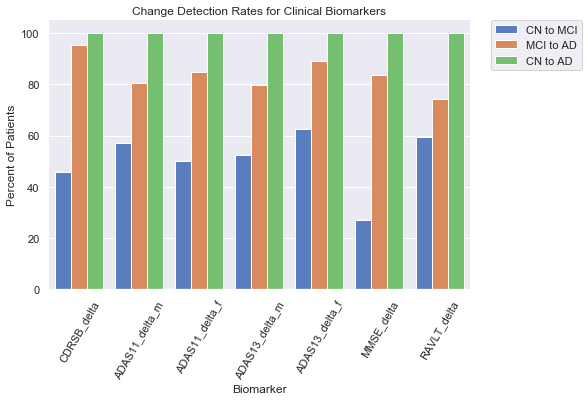

In [46]:
sda.summarize_clin_changes(changes)

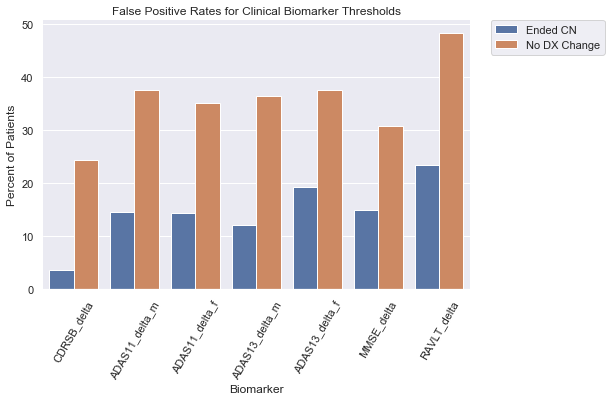

In [47]:
# false positive rates for the clinical biomarkers
sda.summarize_clin_fps(changes)

#### Summary of Changes in Scan Biomarkers

Overall, the scan thresholds had less detection power than the clinical exams. Only the change in ventricles for males from CN to AD had a detection rate of 100%. Most of the detection rates were less than 80%. Entorhinal_delta overall appeard to have the worst detection rate. 

This doesn't mean that these biomarkers can't be used to detect a change, but the advice would be to use a combination of biomarkers. The methods used in this analysis didn't produce the best combination of biomarkers, and further analysis will be performed to answer this question.

The false positive rate for patients that ended with a CN diagnosis mostly ranged from about 20-30%, though the rate for change in ventricles for males again performed the best with a false positive rate under 20%. 

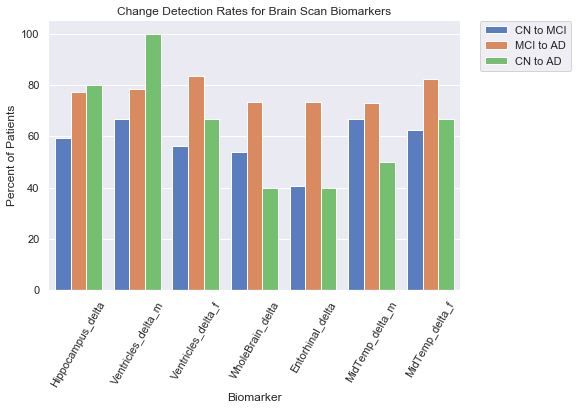

In [48]:
sda.summarize_scan_changes(changes)

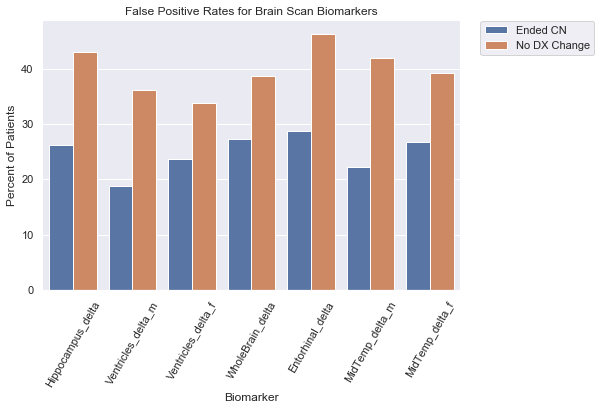

In [49]:
sda.summarize_scan_fps(changes)

### Baseline Values for Predicting Alzheimer's Disease
- From the exploratory data analysis, the following biomarkers emerged as good candidates for statistical testing
    - Clinical tests: ADAS11 and ADAS13
    - Brain scans: Hippocampus and MidTemp
- Approach
    - The data will be divided by diagnosis into two groups: patients that developed Alzheimer's by the end of the study and those that didn't
    - Permutation tests will be used to determine whether or not gender has an effect on each biomarker, and the data will be split by gender when a significant p-value is found
    - Permutation tests will also be used to test whether or not the AD group and non AD group have the same distribution for each baseline marker
        - If a difference is found, bootstrapping will be used to estimate the 75th and 95th percentiles for the non AD group (the most extreme values), and the 25th and 5th percentile for the AD group (the least extreme values)
            - These results will be used to determine if there is a threshold that can be used to identify a high percentage of patients that will develop AD, while excluding a large percentage of patients that would not develop AD (false positives)

#### Groups are being divided by gender

The statistical tests below show a difference between males/females for all four parameters analyzed (see below).

Distribution Test for Males/Females
Variable:  ADAS11_bl
If p < 0.05, then split the data by gender
p-value:  0.0027


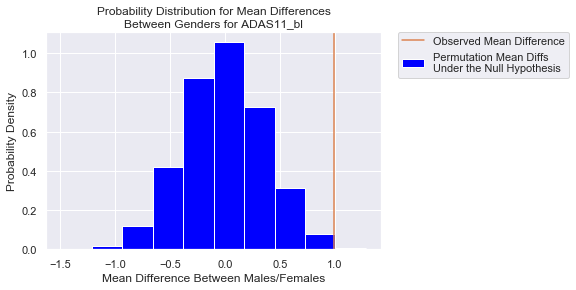

In [50]:
sda.test_gender_effect(final_exam, 'ADAS11_bl', 10000)

Distribution Test for Males/Females
Variable:  ADAS13_bl
If p < 0.05, then split the data by gender
p-value:  0.0016


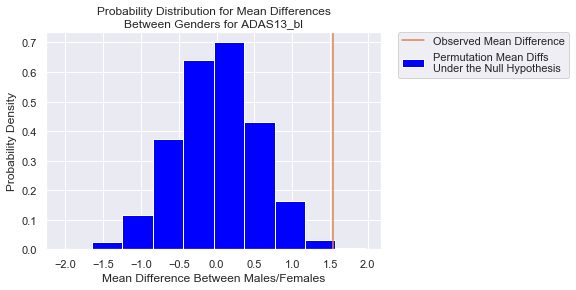

In [51]:
sda.test_gender_effect(final_exam, 'ADAS13_bl', 10000)

Distribution Test for Males/Females
Variable:  Hippocampus_bl
If p < 0.05, then split the data by gender
p-value:  0.0


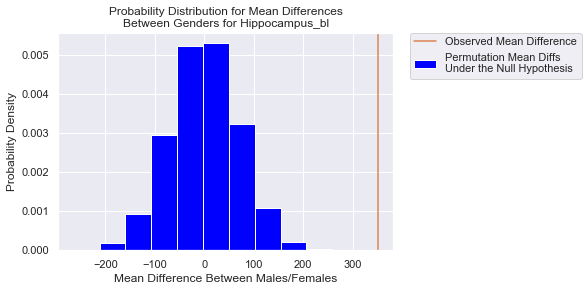

In [52]:
sda.test_gender_effect(final_exam, 'Hippocampus_bl', 10000)

Distribution Test for Males/Females
Variable:  MidTemp_bl
If p < 0.05, then split the data by gender
p-value:  0.0


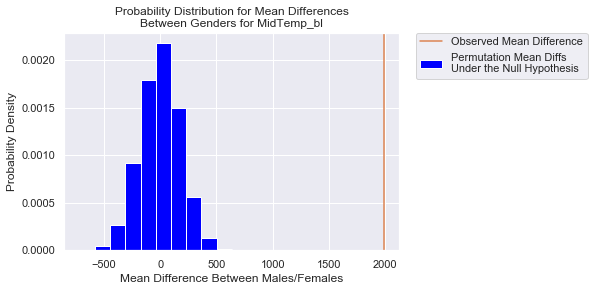

In [53]:
sda.test_gender_effect(final_exam, 'MidTemp_bl', 10000)

#### Tests for a difference between in baseline biomarkers AD vs. Non AD

These tests determine whether or not the observed difference between patients that ended the study with AD is likely due to random chance. The results strongly suggest that the observed difference between groups is higher than would be expected under the null hypothesis, that the distributions are the same. It should be noted that these tests were found to be significant for all baseline biomarkers in the study, not just the four I originally chose to examine.

Distribution Test for AD/Non AD
Variable:  ADAS11_bl
If p < 0.05, then patients that ended AD had a different distribution for  ADAS11_bl
p-value:  0.0


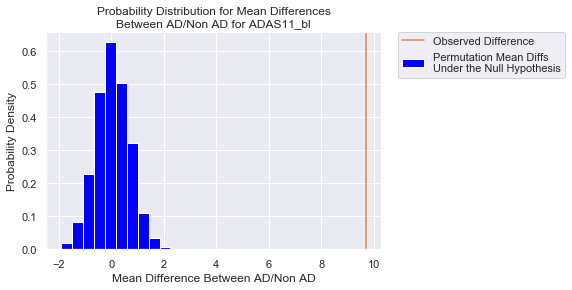

In [54]:
sda.bl_perm_test(final_exam, 'ADAS11_bl', 'Male', 1000)

Distribution Test for AD/Non AD
Variable:  ADAS11_bl
If p < 0.05, then patients that ended AD had a different distribution for  ADAS11_bl
p-value:  0.0


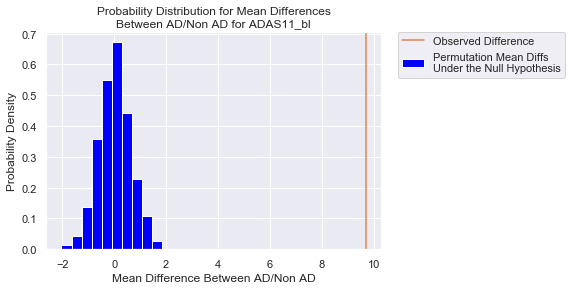

In [55]:
sda.bl_perm_test(final_exam, 'ADAS11_bl', 'Female', 1000)

Distribution Test for AD/Non AD
Variable:  ADAS13_bl
If p < 0.05, then patients that ended AD had a different distribution for  ADAS13_bl
p-value:  0.0


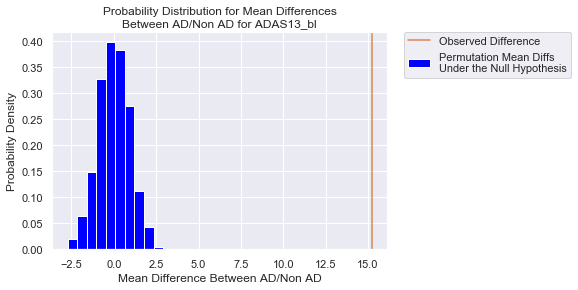

In [56]:
sda.bl_perm_test(final_exam, 'ADAS13_bl', 'Male', 1000)

Distribution Test for AD/Non AD
Variable:  ADAS13_bl
If p < 0.05, then patients that ended AD had a different distribution for  ADAS13_bl
p-value:  0.0


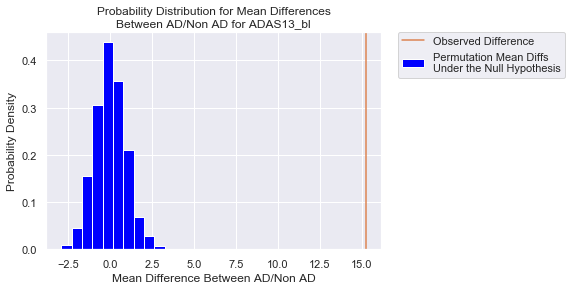

In [57]:
sda.bl_perm_test(final_exam, 'ADAS13_bl', 'Female', 1000)

Distribution Test for AD/Non AD
Variable:  Hippocampus_bl
If p < 0.05, then patients that ended AD had a different distribution for  Hippocampus_bl
p-value:  0.0


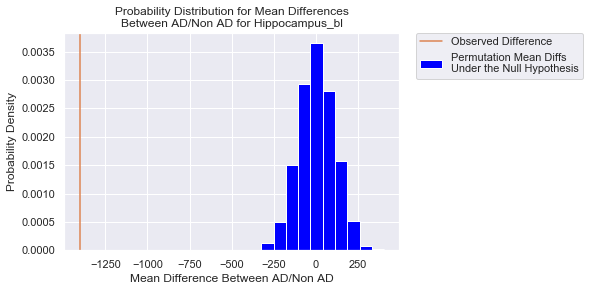

In [58]:
sda.bl_perm_test(final_exam, 'Hippocampus_bl', 'Male', 1000)

Distribution Test for AD/Non AD
Variable:  Hippocampus_bl
If p < 0.05, then patients that ended AD had a different distribution for  Hippocampus_bl
p-value:  0.0


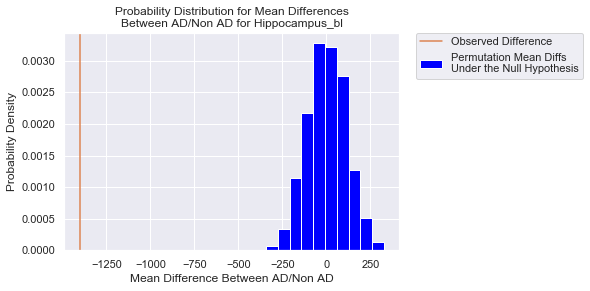

In [59]:
sda.bl_perm_test(final_exam, 'Hippocampus_bl', 'Female', 1000)

Distribution Test for AD/Non AD
Variable:  MidTemp_bl
If p < 0.05, then patients that ended AD had a different distribution for  MidTemp_bl
p-value:  0.0


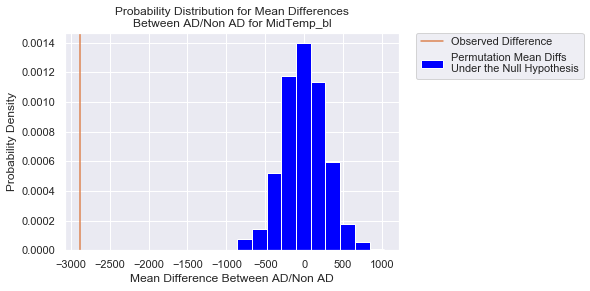

In [60]:
sda.bl_perm_test(final_exam, 'MidTemp_bl', 'Male', 1000)

Distribution Test for AD/Non AD
Variable:  MidTemp_bl
If p < 0.05, then patients that ended AD had a different distribution for  MidTemp_bl
p-value:  0.0


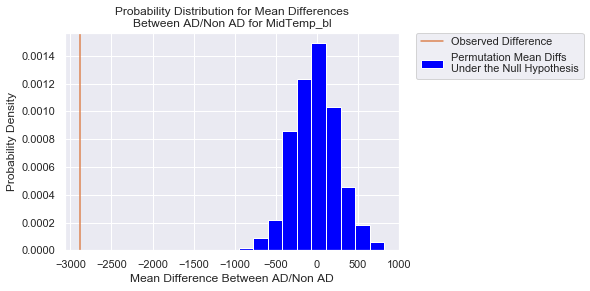

In [61]:
sda.bl_perm_test(final_exam, 'MidTemp_bl', 'Female', 1000)

#### Some Assumptions for interpretation of results of baseline tests
- A diagnosis would occur within the time limit of a patient's first to last visit
    - The overall duration of the study was about 11 years, with most patients not having 11 years worth of data
- We are assuming also that this sample of patients is representative of the general population
    - This assumption is important for applying these thresholds to other potential patients
    - Further exploration of these calculated thresholds should be performed to test their consistency and applicability to other samples of patients

#### ADAS11 Baseline Values for Males

Analysis of ADAS11 baseline values for males points to a threshold range of about 10.4 to 11.3. At a lower range of 10.4, about 81.6% of patients that develop AD could be notified they are higher risk, with a 25% false positive rate where. This means that about 25% of patients that wouldn't develop AD, would score 10.4 or higher and be notified they are high risk. The upper end of the threshold of 11.3 would allow notification of 75% of patients that develop AD that they are high risk while reducing the the false positive rate to about 20%.

In [62]:
# initialize dataframe to store summary information
bl = pd.DataFrame(columns = ['biomarker', 'Detect Rate @25% FP', 'False Positive Rate @75% DR'])

25% false positive threshold value:  10.462859749999982
75% detection threshold value:  11.320033749999935


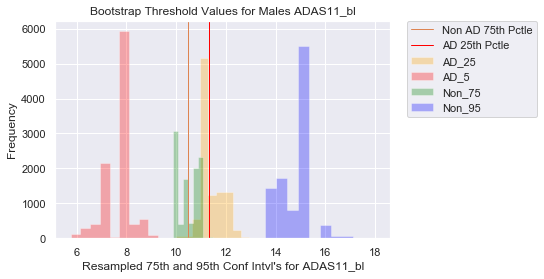

In [63]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'ADAS11_bl', 10000, 'males')

In [64]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'ADAS11_bl', 'males', increase=True)
add = pd.DataFrame({'biomarker': 'ADAS11_bl_m', 'TH_25_FP': np.mean(bs_non_75['ADAS11_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['ADAS11_bl']), 'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 81.62 %
The false positive rate for 75% AD detection is 20.2 %


C:\Users\chuck.tucker\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


#### Baseline ADAS11 for Females

The threshold range for females was about 8.8 to 11.6. At the lower end of 8.8, there would be a 25% false positive rate for patients that wouldn't progress to AD, but about 90% of patients that develop AD would be notified they are high risk at an initial visit. Increasing the threshold to 11.6 would reduce the detection rate to 75% but lower the false positive rate to just 10%.

25% false positive threshold value:  8.783666000000043
75% detection threshold value:  11.57106299999999


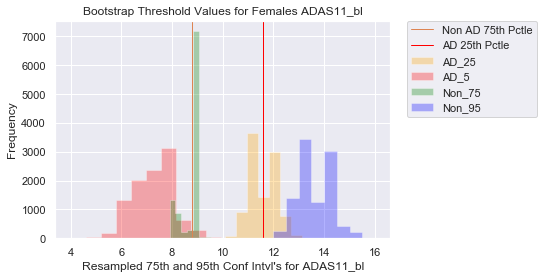

In [65]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'ADAS11_bl', 10000, 'females')

In [66]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'ADAS11_bl', 'females', increase=True)
add = pd.DataFrame({'biomarker': 'ADAS11_bl_f', 'TH_25_FP': np.mean(bs_non_75['ADAS11_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['ADAS11_bl']),
                    'Detect Rate @25% FP': dr25, 'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 90.43 %
The false positive rate for 75% AD detection is 9.98 %


#### Baseline ADAS11 overall interpretation

Statistical analysis shows that ADAS11 baseline scores were pretty good measures for being able to predict which patients would develop AD. There would be some patients that wouldn't progress to AD that would be notified of having a higher risk, but a large majority of patients that would develop AD would be able to be notified at an initial visit. 

These threshold values could be used to identify patients with a high risk of developing AD, and the predictive power would likely increase when adding additional biomarkers.

#### Baseline ADAS13 for Males

The lower threshold for males was about 16.7 with the upper end around 19.1. Using the lower end of this threshold, about 85% of patients that would develop AD would be notified that they are at higher risk. There would also be a false positive rate of about 25% for patients that wouldn't develop AD. Using the higher end of the range would reduce the power of the threshold to identifying 75% of patients that would develop AD, but the false positive rate would be reduced to just 15%.

25% false positive threshold value:  16.734824000000295
75% detection threshold value:  19.119863750000782


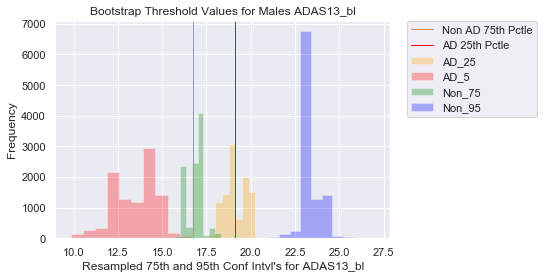

In [67]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'ADAS13_bl', 10000, 'males')

In [68]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'ADAS13_bl', 'males', increase=True)
add = pd.DataFrame({'biomarker': 'ADAS13_bl_m', 'TH_25_FP': np.mean(bs_non_75['ADAS13_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['ADAS13_bl']),
                    'Detect Rate @25% FP': dr25, 'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 85.75 %
The false positive rate for 75% AD detection is 14.56 %


#### Baseline ADAS13 for Females

The baseline ADAS13 for females shows a better detection and false positive rates than it does for females, much like ADAS11. The threshold range for females is about 13.8 to 20.0. This is a wide range, and there is a tradeoff between detection power and false positive rates depending on which end is used. A threshold of 13.8 would inform 25% of patients that wouldn't progress to AD that they are at a higher risk, however, about 93% of patients that would develop AD would be informed. On the other end of the spectrum, a threshold of 20.0 would inform 75% of patients that would develop AD, and at the same time reduce the false positive percentage to just 6.5%. It seems that a value in the middle might be a better choice to use as a threshold. 

25% false positive threshold value:  13.778249499999857
75% detection threshold value:  19.99866100000002


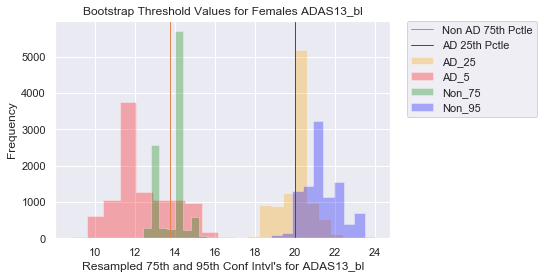

In [93]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'ADAS13_bl', 10000, 'females')

In [94]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'ADAS13_bl', 'females', increase=True)
add = pd.DataFrame({'biomarker': 'ADAS13_bl_f', 'TH_25_FP': np.mean(bs_non_75['ADAS13_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['ADAS13_bl']),
                    'Detect Rate @25% FP': dr25, 'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 93.0 %
The false positive rate for 75% AD detection is 7.82 %


#### Overall Interpretation of ADAS13

ADAS13 performed much like ADAS11 with predictive slightly better results for females than males, but with relatively high rates of detection considered with relatively low rates of false positives. Again, this detection ability would likely improve when considered along with ADAS11 or other biomarkers.

#### Baseline Hippocampus Values for Males

The baseline hippocampus threshold for males had a range of 6673 to 6973. As the hippocampus decreases with progression to AD, the 'lower' end of the threshold is 6973, which would inform about 75% of patients that would develop AD that they have a higher risk, while having a false positive rate of about 35% for patients that wouldn't develop AD. The 'greater' end of the spectrum uses a threshold of about 6673, and would identify just 66% of patients that would develop AD, with a false positive rate of about 25%. The are not very good numbers to be used to inform patients of elevated risk, without taking into account other biomarkers

25% false positive threshold value:  6673.1884
75% detection threshold value:  6971.392625


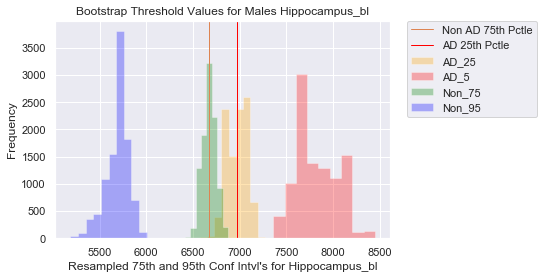

In [71]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'Hippocampus_bl', 10000, 'males')

In [72]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'Hippocampus_bl', 'males', increase=False)
add = pd.DataFrame({'biomarker': 'Hippocampus_bl_m', 'TH_25_FP': np.mean(bs_non_75['Hippocampus_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['Hippocampus_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 65.83 %
The false positive rate for 75% AD detection is 35.18 %


#### Baseline Hippocampus for Females

The range for threshold values for females was 6241 to 6390. Using the 'lower' end of the threshold of 6390 would identify about 80% of patients that would develop AD, with a false positive rate of about 25% for those that wouldn't develop AD. Meanwhile using the 6241 threshold would help to notify 75% of patients that would develop AD with a false positive rate of around 21% for patients that wouldn't develop AD.

25% false positive threshold value:  6391.7269
75% detection threshold value:  6239.1145


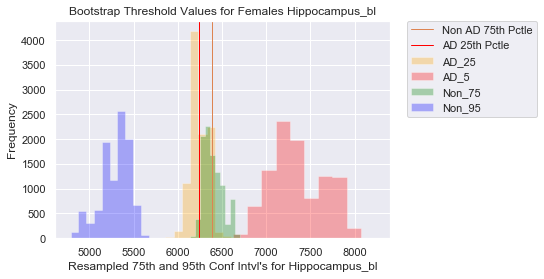

In [73]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'Hippocampus_bl', 10000, 'females')

In [74]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'Hippocampus_bl', 'females', increase=False)
add = pd.DataFrame({'biomarker': 'Hippocampus_bl_f', 'TH_25_FP': np.mean(bs_non_75['Hippocampus_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['Hippocampus_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 80.22 %
The false positive rate for 75% AD detection is 21.3 %


#### Overall Interpretatoin for Baseline Hippocampus

Similarly to other measures, baseline hippocampus values appear to have more predicitve power for females than males. The threshold values identified could help by notifying patients that may be at higher risk for AD, but there would inevitably be some patients that would be notified of having a higher risk that wouldn't develop AD. 

#### Baseline MidTemp for Males

The baseline MidTemp threshold for males ranged 19176 to 20683. Because MidTemp decreases with progression to AD, 20683 would be the threshold that should catch a higher percentage of patients progressing to AD. This threshold only detects 75% of AD patients and has a false positive rate of about 44.9%. Increasing the threshold to notify patients of being high risk to 19176 would decrease the detection rate to 56.61% though the false positive rate would be just 25%.

25% false positive threshold value:  19179.366825
75% detection threshold value:  20687.0753


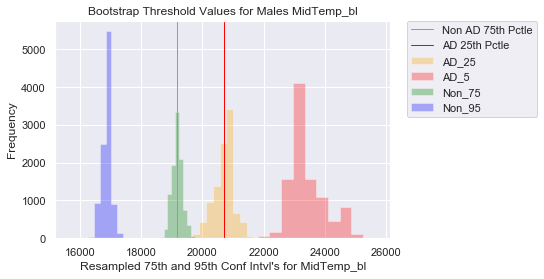

In [75]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'MidTemp_bl', 10000, 'males')

In [76]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'MidTemp_bl', 'males', increase=False)
add = pd.DataFrame({'biomarker': 'MidTemp_bl_m', 'TH_25_FP': np.mean(bs_non_75['MidTemp_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['MidTemp_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 56.55 %
The false positive rate for 75% AD detection is 44.82 %


#### Baseline MidTemp for Females

The MidTemp thresholds for females were a little better than for males, with a range of 17617 to 18028. Using the higher MidTemp value of 18028 would help notify about 75% of patients that would progress to AD, and the false positive rate would be about 30%. Changing the threshold to 17617 would decrease the false positive rate to 25% but also lower the detection rate to 70%.

25% false positive threshold value:  17615.57195
75% detection threshold value:  18032.6849


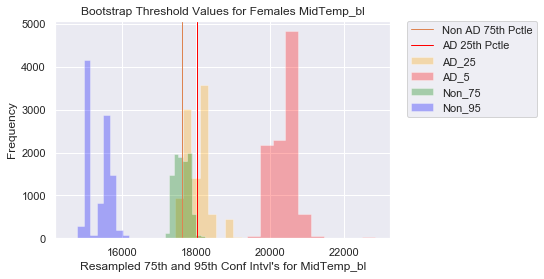

In [77]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'MidTemp_bl', 10000, 'females')

In [78]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'MidTemp_bl', 'females', increase=False)
add = pd.DataFrame({'biomarker': 'MidTemp_bl_f', 'TH_25_FP': np.mean(bs_non_75['MidTemp_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['MidTemp_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 70.12 %
The false positive rate for 75% AD detection is 30.47 %


#### Overall Interpretation of Baseline MidTemp

The thresholds for females once again show more predictive power than for males, however, the false positive rates were relatively high, while failing to meet the detection rate achieved by other biomarkers like the ADAS tests. This biomarker could be used to help warn patients that are at higher risk but given these results, the recommendation would be to include other biomarkers in an assessment before informing patients.

#### MMSE Baseline for Males

MMSE baseline values for males show overlapping distributions where the detection and false positive rates reverse. This is likely because the 25th percentile for AD and the 75th percentile for non AD patients are very close together. The threshold value is somewhere in the 27.2 range, and this would have about a 75% detection rate and 25% false positive rate.

25% false positive threshold value:  27.368225
75% detection threshold value:  27.0365


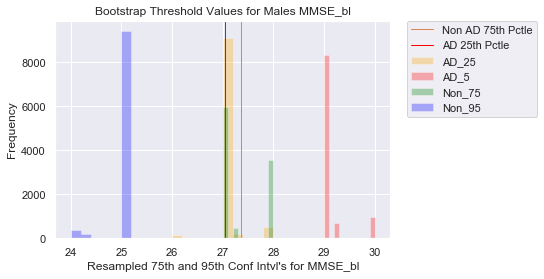

In [79]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'MMSE_bl', 10000, 'males')

In [80]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'MMSE_bl', 'males', increase=False)
add = pd.DataFrame({'biomarker': 'MMSE_bl_m', 'TH_25_FP': np.mean(bs_non_75['MMSE_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['MMSE_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 79.56 %
The false positive rate for 75% AD detection is 25.79 %


#### Baseline MMSE for Females

The threshold range for females is a similar value to males 26-28 (mean 27), though the predictive power appears much greater. The detection rate at MMSE of 28 is about 91% for females, with a 25% false positive rate. Reducing the detection rate to 75% with a threshold of 26.1 produces a false positive rate of just 10%. 

25% false positive threshold value:  27.99995
75% detection threshold value:  26.1487


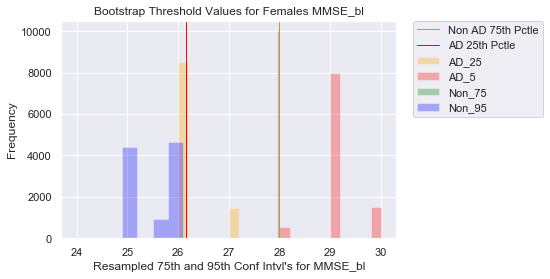

In [81]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'MMSE_bl', 10000, 'females')

In [82]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'MMSE_bl', 'females', increase=False)
add = pd.DataFrame({'biomarker': 'MMSE_bl_f', 'TH_25_FP': np.mean(bs_non_75['MMSE_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['MMSE_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 84.7 %
The false positive rate for 75% AD detection is 9.98 %


#### Baseline CDRSB for Males

The threshold value for males is around 1.5. Because the lower and upper of the range is so close, you could expect a detection rate rate around 75% with a false positive rate around 25%. 

25% false positive threshold value:  1.4800375
75% detection threshold value:  1.541775


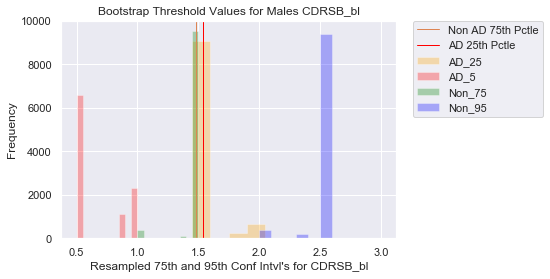

In [83]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'CDRSB_bl', 10000, 'males')

In [84]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'CDRSB_bl', 'males', increase=True)
add = pd.DataFrame({'biomarker': 'CDRSB_bl_m', 'TH_25_FP': np.mean(bs_non_75['CDRSB_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['CDRSB_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 83.22 %
The false positive rate for 75% AD detection is 15.5 %


#### Baseline CDRSB for Females

Once again, the threshold values show higher detection power with lower false positive rates for females. The range for females was 1.03 to 1.91, with a detection rate at 1.03 of about 86% (25% false positive). Decreasing the detection rate to 75% by increasing the threshold to 1.91 would reduce the false positive rate to about 11%.

25% false positive threshold value:  1.033625
75% detection threshold value:  1.90555


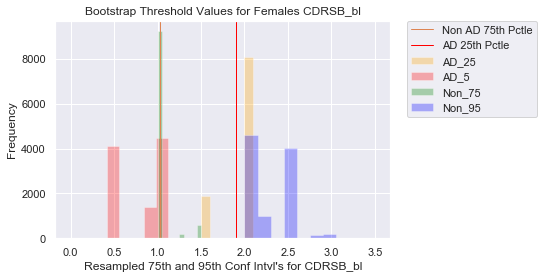

In [85]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'CDRSB_bl', 10000, 'females')

In [86]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'CDRSB_bl', 'females', increase=True)
add = pd.DataFrame({'biomarker': 'CDRSB_bl_f', 'TH_25_FP': np.mean(bs_non_75['CDRSB_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['CDRSB_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 85.99 %
The false positive rate for 75% AD detection is 11.31 %


#### Overall Impression for CDRSB

The predictive power is once again better for females, but the CDRSB baseline values do show some decent predictive power for AD while not producing unacceptable levels of false positives.

#### Baseline RAVLT_immediate for Males

The threshold values for males are relatively close together, with a mean around 29.1. Because the upper and lower bounds of the threshold are very similar, this threshold would produce a detection rate around 75% with a false positive rate around 25%.

25% false positive threshold value:  29.34495
75% detection threshold value:  28.8837


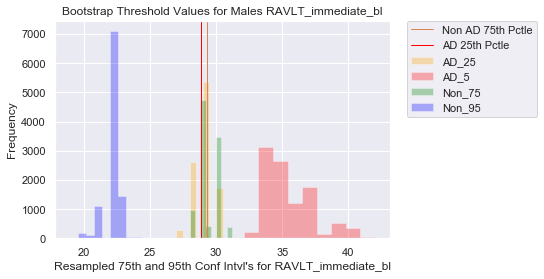

In [87]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'RAVLT_immediate_bl', 10000, 'males')

In [88]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'RAVLT_immediate_bl', 'males', increase=False)
add = pd.DataFrame({'biomarker': 'RAVLT_immediate_bl_m', 'TH_25_FP': np.mean(bs_non_75['RAVLT_immediate_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['RAVLT_immediate_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 77.57 %
The false positive rate for 75% AD detection is 22.39 %


#### Baseline RAVLT_immediate for Females

Females had a larger range for the threshold RAVLT_immediate, with a range of 32.3 to 37.3. At the higher detection level of 37.3 there would be a 25% false positive rate but 91.1% detection rate. Decreasing the threshold value to 32.3 would decrease the detection rate to 75% but also reduce the false positive rate to about 14%.

25% false positive threshold value:  37.28625
75% detection threshold value:  32.2817


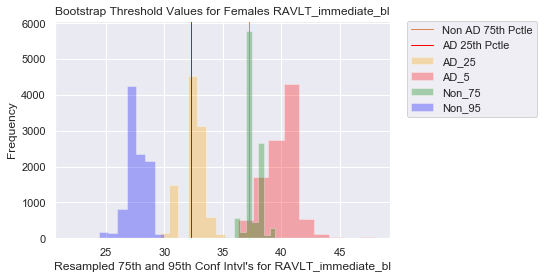

In [89]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'RAVLT_immediate_bl', 10000, 'females')

In [90]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'RAVLT_immediate_bl', 'females', increase=False)
add = pd.DataFrame({'biomarker': 'RAVLT_immediate_bl_f', 'TH_25_FP': np.mean(bs_non_75['RAVLT_immediate_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['RAVLT_immediate_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 91.11 %
The false positive rate for 75% AD detection is 13.72 %


#### Overall impression for RAVLT_immediate

Once again, there was greater detection power for females with a lower false positive rate. However, RAVLT_immediate does appear to be a relatively good predictor for males and females. This is likely especially true when considered with other biomarkers.

#### Baseline Ventricles for Males

Baseline ventricles measurements do not appear to be good at predicting AD for this study. A detection rate of 75% would produce a false positive rate of about 56%. Decreasing the false positive rate to 25% would also decrease the detection rate to just 45%.

25% false positive threshold value:  50801.381075
75% detection threshold value:  33446.984125


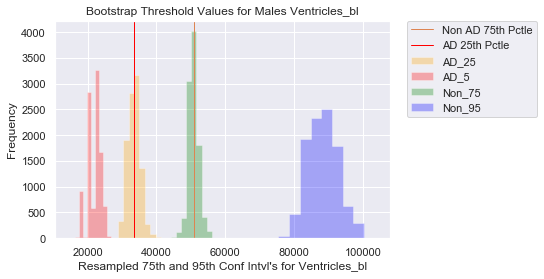

In [91]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'Ventricles_bl', 10000, 'males')

In [92]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'Ventricles_bl', 'males', increase=True)
add = pd.DataFrame({'biomarker': 'Ventricles_bl_m', 'TH_25_FP': np.mean(bs_non_75['Ventricles_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['Ventricles_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 45.44 %
The false positive rate for 75% AD detection is 56.06 %


#### Baseline Ventricles for Females

The story for females is similar to males with the 75% detection threshold producing a false positive rate of about 53%. Decreaesing the false positive rate to 25% would also decrease the detection rate to just 40%.

25% false positive threshold value:  37953.43375
75% detection threshold value:  24380.1151


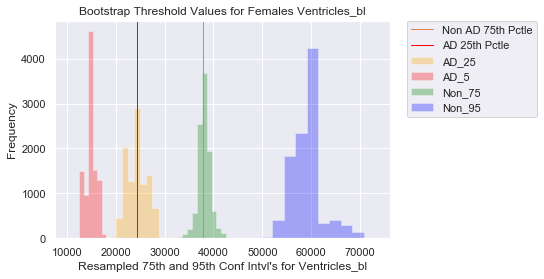

In [93]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'Ventricles_bl', 10000, 'females')

In [94]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'Ventricles_bl', 'females', increase=True)
add = pd.DataFrame({'biomarker': 'Ventricles_bl_f', 'TH_25_FP': np.mean(bs_non_75['Ventricles_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['Ventricles_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 40.11 %
The false positive rate for 75% AD detection is 52.56 %


#### Overall impression for ventricles

Baseline values for ventricles were poor at predicting whether or not a patient would develop AD during this study. While a change in ventricles over time would likely improve overall predictive power when included in a model, the baseline ventricle value do not appear to hold much predictive power.

#### Baseline Entorhinal for Males

The detection rate with a 25% false positive rate is just 67.4%. The false positive rate for 75% AD detection was about 34.3%. This measure does appear to have some predictive power but would include false positives.

25% false positive threshold value:  3474.43185
75% detection threshold value:  3656.512575


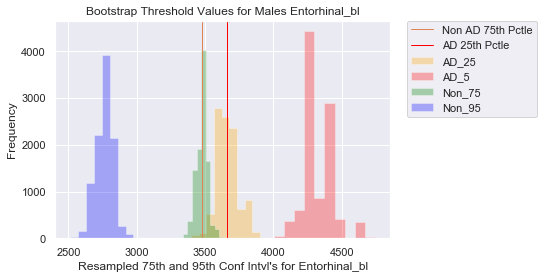

In [95]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'Entorhinal_bl', 10000, 'males')

In [96]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'Entorhinal_bl', 'males', increase=False)
add = pd.DataFrame({'biomarker': 'Entorhinal_bl_m', 'TH_25_FP': np.mean(bs_non_75['Entorhinal_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['Entorhinal_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 67.31 %
The false positive rate for 75% AD detection is 34.29 %


#### Baseline Entorhinal for Females

The upper and lower thresholds for females were very similar around 3148. For this reason, the detection rate and false positive rate are consistent around 75% for detection and 25% for false positive.

25% false positive threshold value:  3152.98245
75% detection threshold value:  3145.3326


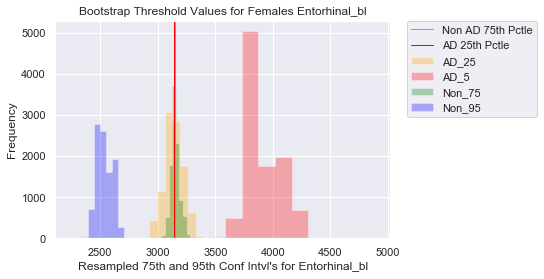

In [97]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'Entorhinal_bl', 10000, 'females')

In [98]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'Entorhinal_bl', 'females', increase=False)
add = pd.DataFrame({'biomarker': 'Entorhinal_bl_f', 'TH_25_FP': np.mean(bs_non_75['Entorhinal_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['Entorhinal_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 75.83 %
The false positive rate for 75% AD detection is 24.79 %


#### Overall Entorhinal Impression

Again the analysis shows that the threshold holds more predictive power with less error for females. This biomarker does show some predictive power, but it should likely be considered in conjunction with other biomarkers when making a determination on informing a patient of increased risk for developing AD.

#### Baseline WholeBrain for Males

The distributions for WholeBrain have much overlap as illustrated by a high false positive rate of almost 67% for a detection rate of 75%. Reducing the false positive rate to 25% would only have a detection power of about 47% for AD for the males from this study.

25% false positive threshold value:  1025620.15235
75% detection threshold value:  1120209.1585


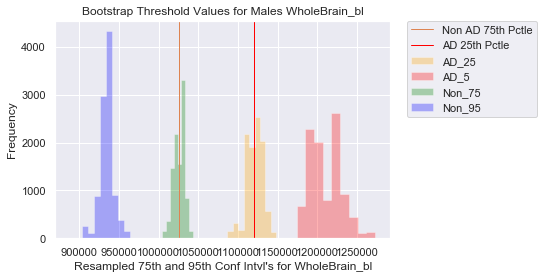

In [99]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'WholeBrain_bl', 10000, 'males')

In [100]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'WholeBrain_bl', 'males', increase=False)
add = pd.DataFrame({'biomarker': 'WholeBrain_bl_m', 'TH_25_FP': np.mean(bs_non_75['WholeBrain_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['WholeBrain_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 47.43 %
The false positive rate for 75% AD detection is 66.62 %


#### Baseline WholeBrain for Females

The whole brain story is similar for females as with males. A detection rate of 75% would lead to a false positive rate of over 46%. Decreasing the false positive rate to 25% would also decrease the detection power to just 56%.

25% false positive threshold value:  928797.5174
75% detection threshold value:  979489.3324


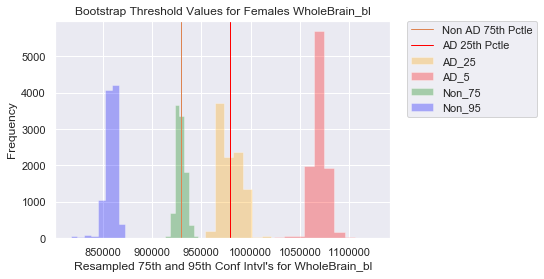

In [101]:
bs_non_75, bs_ad_25 = sda.bs_percentile(final_exam, 'WholeBrain_bl', 10000, 'females')

In [102]:
dr25, fp75 = sda.get_pctles(bs_non_75, bs_ad_25, final_exam, 'WholeBrain_bl', 'females', increase=False)
add = pd.DataFrame({'biomarker': 'WholeBrain_bl_f', 'TH_25_FP': np.mean(bs_non_75['WholeBrain_bl']), 
                    'TH_75_DR': np.mean(bs_ad_25['WholeBrain_bl']),
                    'Detect Rate @25% FP': dr25, 
                    'False Positive Rate @75% DR': fp75}, 
                   index=[0])
bl = bl.append(add, sort=True, ignore_index=True)

The detection rate for AD with 25% false positive is 55.97 %
The false positive rate for 75% AD detection is 46.37 %


#### Overall impression for baseline WholeBrain

The analysis of WholeBrain suggests there is not much predictive power in the baseline measurements alone. WholeBrain measurements are likely similar to ventricle measurements in that the predictive power lies within a change in this parameter more than with an initial measurement.

In [103]:
# reorder the dataframe to the standard order for this project (clinical biomarkers then scan biomarkers)
order = [2,3,4,5,10,11,18,19,6,7,0,1,8,9,12,13,16,17,14,15]
bl.loc[:,'order'] = order
bl = bl.set_index('order').sort_index()
bl.index.name = None

In [104]:
# stack the dataframes appropriately
rk1 = ['Detection Rate @25% FP']*20
df1 = pd.DataFrame({'biomarker': bl.biomarker.values, 'threshold': bl.TH_25_FP.values, 'rate_kind': rk1, 
                    'rate': bl['Detect Rate @25% FP']})
rk2 = ['False Positive Rate @75% DR']*20
df2 = pd.DataFrame({'biomarker': bl.biomarker.values, 'threshold': bl.TH_75_DR.values, 'rate_kind': rk2,
                    'rate': bl['False Positive Rate @75% DR']})
df = df1.append(df2)

Summarize these plots

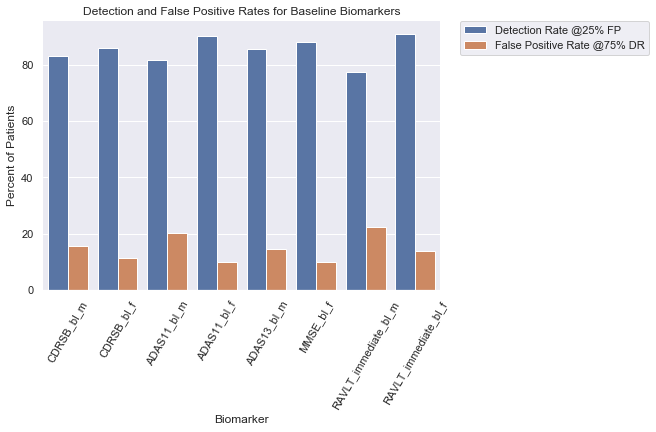

In [106]:
# plot the summary data for clinical exams
sda.summarize_clin_bl(df)


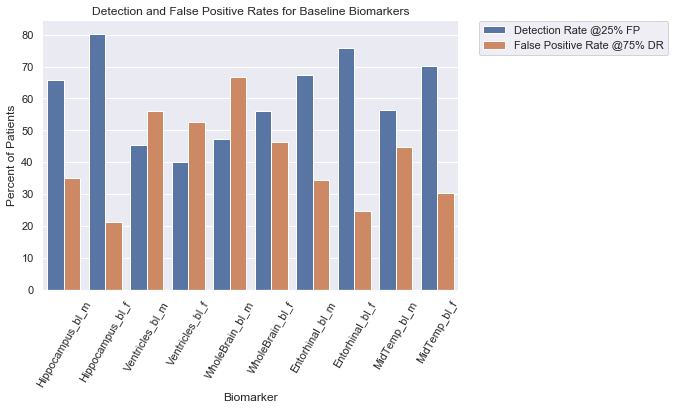

In [107]:
# create the summary plot for the brain scans baseline thresholds
sda.summarize_scans_bl(df)

## Baseline Biomarkers Summary

I was honestly surprised at how well many of the biomarkers were able to predict AD. In many cases, the threshold values for females showed more predictive power while decreasing the rate of false positives. The methods to obtain the thresholds were to bootstrap the extreme values from the data to estimate the outer edges for each distribution. The best baseline biomarkers were the clinical exams. 

Every clinical exam showed predictive power with an acceptable level of false positives, though in some cases, the males were borderline while the female thresholds performed very well. The brain scan data offerred less predictive information with the exception of entorhinal, which again performed better for females than males. 

## Statistical Data Analysis Summary

Statistical analysis of the data reveals that there is much predictive power hidden in the numbers that can be extracted. This analysis has produced some threshold values for changes in biomarkers that were correlated with a change in diagnosis for the patients during this study.

The most important information gained from this analysis are the baseline thresholds that showed promise for being able to predict AD diagnosis in patients at their first visit. These thresholds often performed well on their own, but when they are considered together, there will likely be a very high power to detect AD while providing a low rate of false positives.

This information can potentially be used by medical professionals to consult with patients about early treatment options and planning for patients that are revealed to be more at risk for Alzheimer's. It could also provide comfort to patients that fall more within the normal ranges that don't exceed any of the threshold values during initial and subsequent exams.